In [58]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [59]:
df = pd.read_csv("./data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4840,5730-RIITO,Female,1,No,No,43,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),33.45,1500.25,No
5600,3799-ISUZQ,Male,0,Yes,Yes,7,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.95,529.5,Yes
2182,2530-FMFXO,Male,0,Yes,Yes,56,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,103.20,5873.75,No
6386,6656-GULJQ,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),83.55,6093.3,No
2200,6296-DDOOR,Female,0,No,No,19,Yes,No,DSL,No,...,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25,No


In [60]:
# remove customer id since it is useless for our model
df.drop('customerID', axis = 'columns', inplace = True)

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [61]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [62]:
pd.to_numeric(df.TotalCharges, errors= 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [63]:
df = df[df.TotalCharges != " "]
df.TotalCharges = pd.to_numeric(df.TotalCharges)


In [65]:
df.TotalCharges.dtypes

dtype('float64')

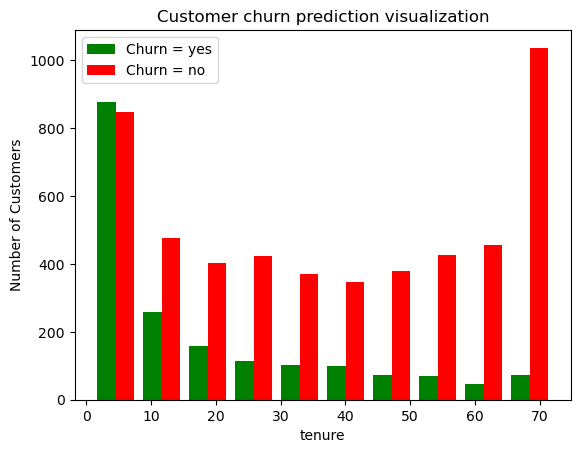

In [74]:
# tenure seems interesting, lets check how many of the loyal customers are not leaving

tenure_churn_no , tenure_churn_yes = df[df.Churn == 'No'].tenure ,  df[df.Churn == 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer churn prediction visualization')

plt.hist([tenure_churn_yes, tenure_churn_no], color= ['green', 'red'], label=['Churn = yes', "Churn = no"])
plt.legend()


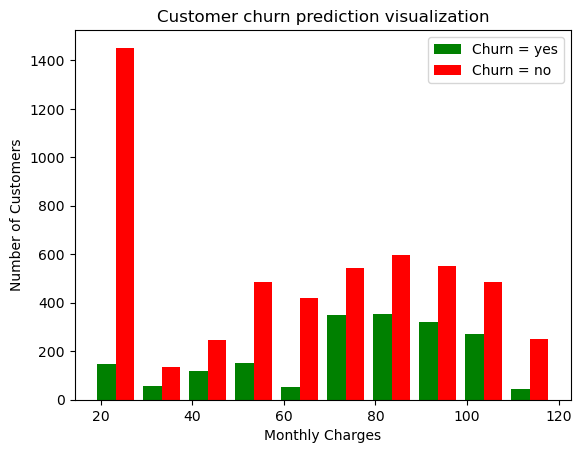

In [75]:
mc_churn_no , mc_churn_yes = df[df.Churn == 'No'].MonthlyCharges ,  df[df.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer churn prediction visualization')

plt.hist([mc_churn_yes, mc_churn_no], color= ['green', 'red'], label=['Churn = yes', "Churn = no"])
plt.legend()

In [79]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')



In [80]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [82]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [84]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity','OnlineBackup',
               'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_cols:
    df[col].replace({'Yes': 1, "No": 0}, inplace=True)

In [89]:
df['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [94]:
# one hot encoding
df1 = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             